# **Analysis of data & Comparison of different Regression Techniques to predict House Prices**

> *Importing all necessary libraries*

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import pipeline
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.linear_model import LinearRegression,ElasticNet, Lasso, BayesianRidge, Ridge
from sklearn import svm
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, BayesianRidge, Ridge
from sklearn import svm
from sklearn.ensemble import  GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import  StackingCVRegressor

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.special import boxcox1p
import warnings

from sklearn.model_selection import GridSearchCV,learning_curve, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

from sklearn.linear_model import LassoCV,ElasticNetCV,Lasso,ElasticNet
from sklearn.kernel_ridge import KernelRidge

from mlxtend.regressor import StackingRegressor
from xgboost import XGBRegressor

> *Loading the data*

In [25]:
train_data = pd.read_csv('train.csv')
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)

y = train_data.SalePrice
X = train_data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])

> *Splitting the data for training and testing and cleaning it using imputation*

In [36]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)
my_imputer=SimpleImputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.fit_transform(test_X)

# Data Visualisation

> *Correlation Check*

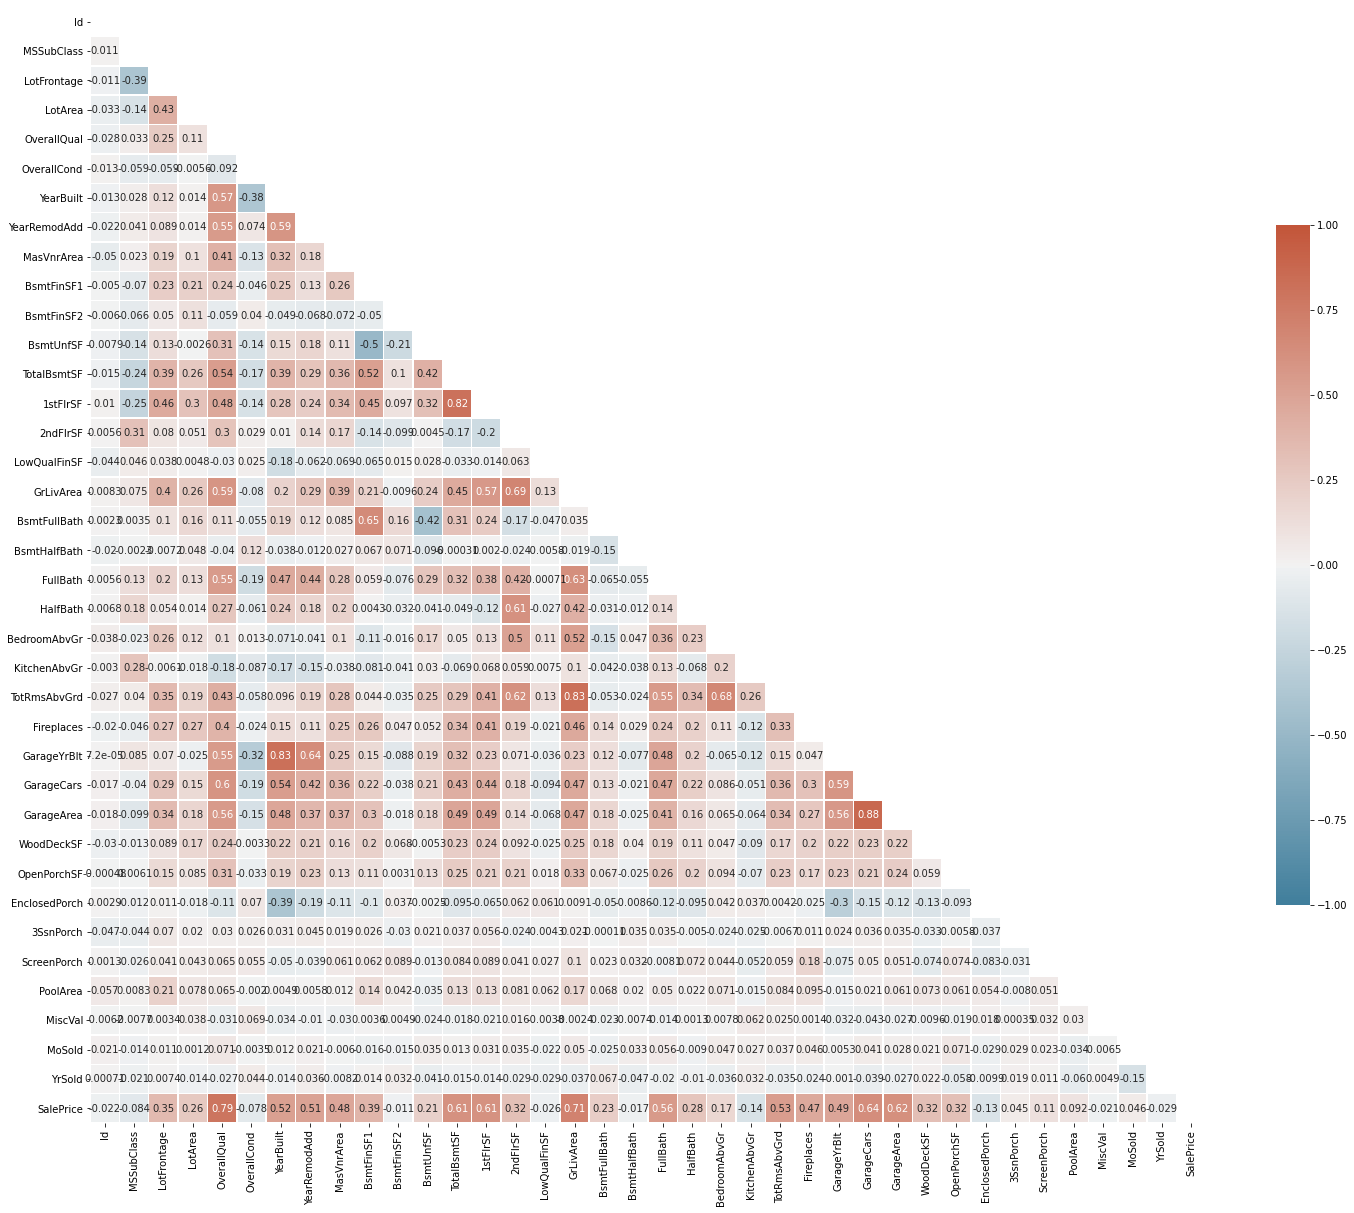

In [41]:
train_corr = train_data.corr(method= 'pearson') # Compute pairwise correlation of columns, excluding NA/null values. pearson : standard correlation coefficient
f, ax = plt.subplots(figsize=(25, 25))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(train_corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

ax = sns.heatmap(train_corr, vmin=-1, vmax=1, mask=mask, cmap=cmap, center=0, annot = True, square=True, linewidths=.5, cbar_kws= {"shrink": .5, 'orientation': 'vertical'}) 

> *OverallQuall vs SalePrice*

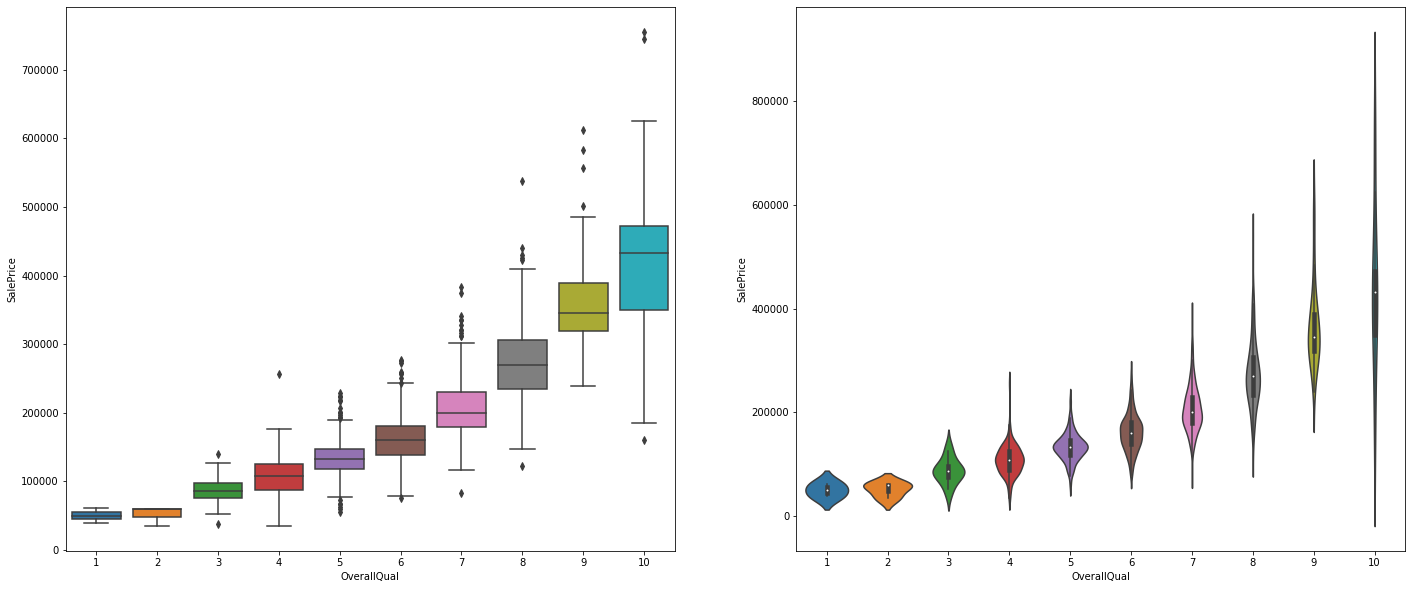

In [43]:
figure, ax = plt.subplots(1,2, figsize = (24,10))
sns.boxplot(data=train_data, x = 'OverallQual', y='SalePrice', ax = ax[0])
sns.violinplot(data=train_data, x = 'OverallQual', y='SalePrice', ax = ax[1])
plt.show()

> *YearBuilt, YearRemodAdd vs SalePrice*

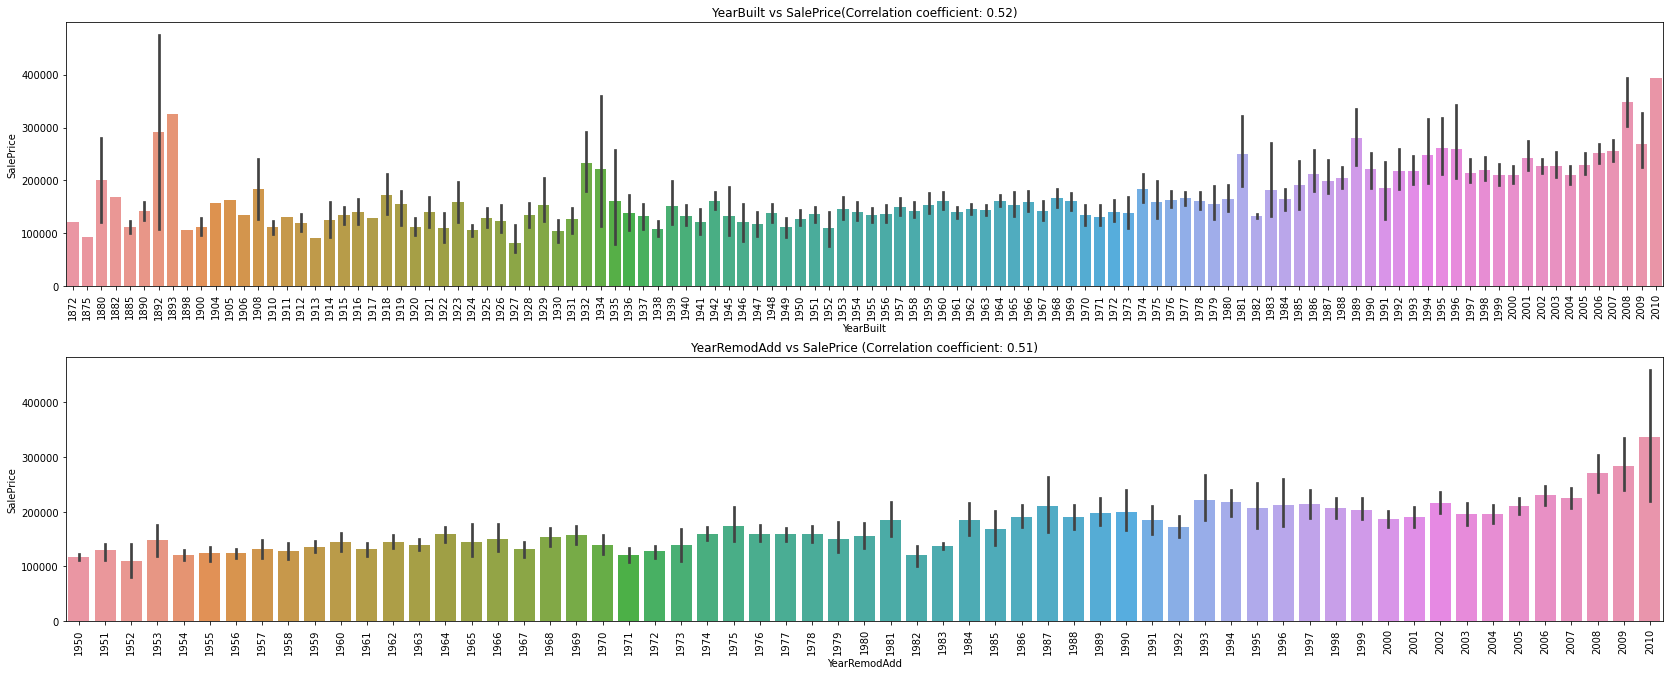

In [46]:
# Correlation coefficient for YearBuilt and YearRemodAdd is 0.52 and 0.51 respectively.

figure, ax = plt.subplots(2,1, figsize = (24,10))
figure.tight_layout(pad=5.0) # To increase the space between subplots

sns.barplot(ax = ax[0], x='YearBuilt', y="SalePrice", data = train_data)
ax[0].set(xlabel="YearBuilt", ylabel = "SalePrice")
ax[0].set_title('YearBuilt vs SalePrice(Correlation coefficient: 0.52)')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)

sns.barplot(ax = ax[1], x='YearRemodAdd', y="SalePrice", data = train_data)
ax[1].set(xlabel="YearRemodAdd", ylabel = "SalePrice")
ax[1].set_title('YearRemodAdd vs SalePrice (Correlation coefficient: 0.51)')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90)

plt.show()

> *TotalBsmtSF, 1stFlrSF, GrLivArea, GarageArea vs SalePrice*

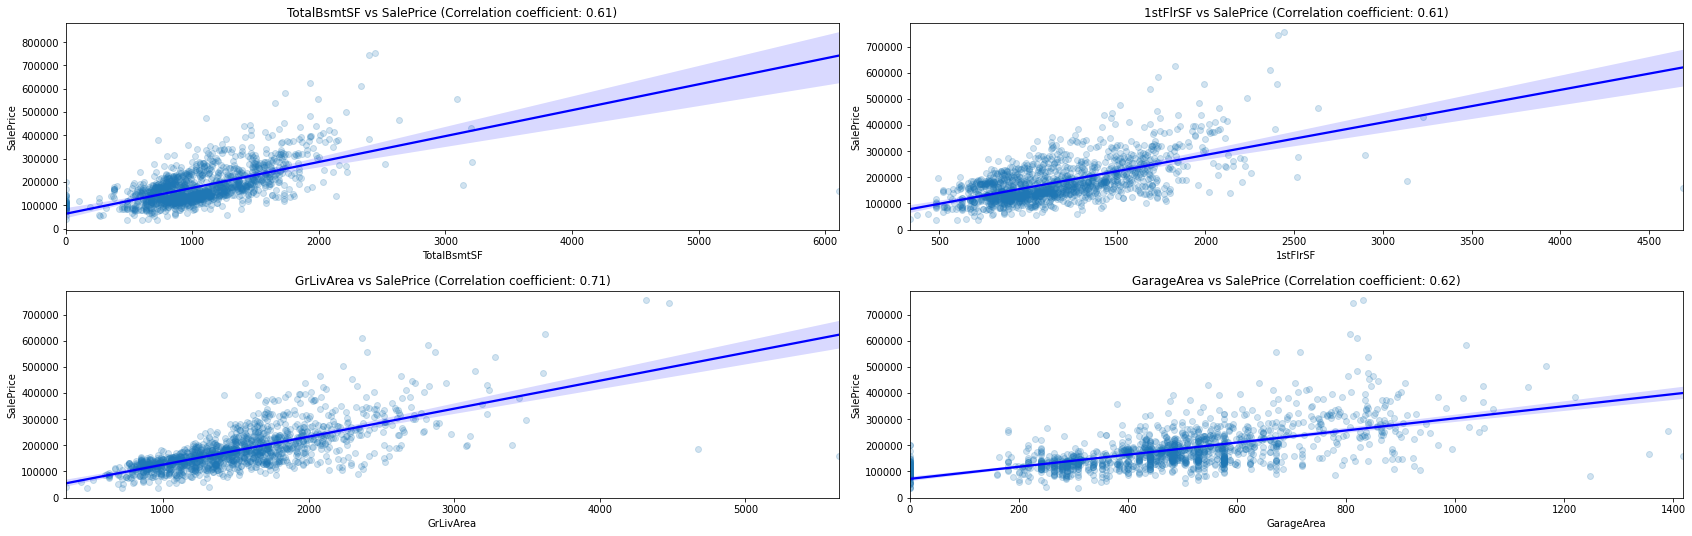

In [47]:
# Correlation coefficient is: TotalBsmtSF(0.61), 1stFlrSF(0.61), GrLivArea(0.71), GarageArea(0.62)

figure, ax = plt.subplots(2,2, figsize = (24,8))
figure.tight_layout(pad=4.0) # To increase the space between subplots

sns.regplot(data=train_data, x = 'TotalBsmtSF', y='SalePrice', scatter_kws={'alpha':0.2}, line_kws={'color': 'blue'}, ax = ax[0,0]) # scatter_kws and line_kws used to pass additional keyword argument to change transparancy and line color
ax[0,0].set_title('TotalBsmtSF vs SalePrice (Correlation coefficient: 0.61)', fontsize = 12)

sns.regplot(data=train_data, x = '1stFlrSF', y='SalePrice', scatter_kws={'alpha':0.2}, line_kws={'color': 'blue'}, ax = ax[0,1])
ax[0,1].set_title('1stFlrSF vs SalePrice (Correlation coefficient: 0.61)', fontsize = 12)

sns.regplot(data=train_data, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.2}, line_kws={'color': 'blue'}, ax = ax[1,0])
ax[1,0].set_title('\nGrLivArea vs SalePrice (Correlation coefficient: 0.71)', fontsize = 12)

sns.regplot(data=train_data, x = 'GarageArea', y='SalePrice', scatter_kws={'alpha':0.2}, line_kws={'color': 'blue'}, ax = ax[1,1])
ax[1,1].set_title('\nGarageArea vs SalePrice (Correlation coefficient: 0.62)', fontsize = 12)

plt.show()

> *FullBath, TotRmsAbvGrd, GarageCars Vs SalePrice*

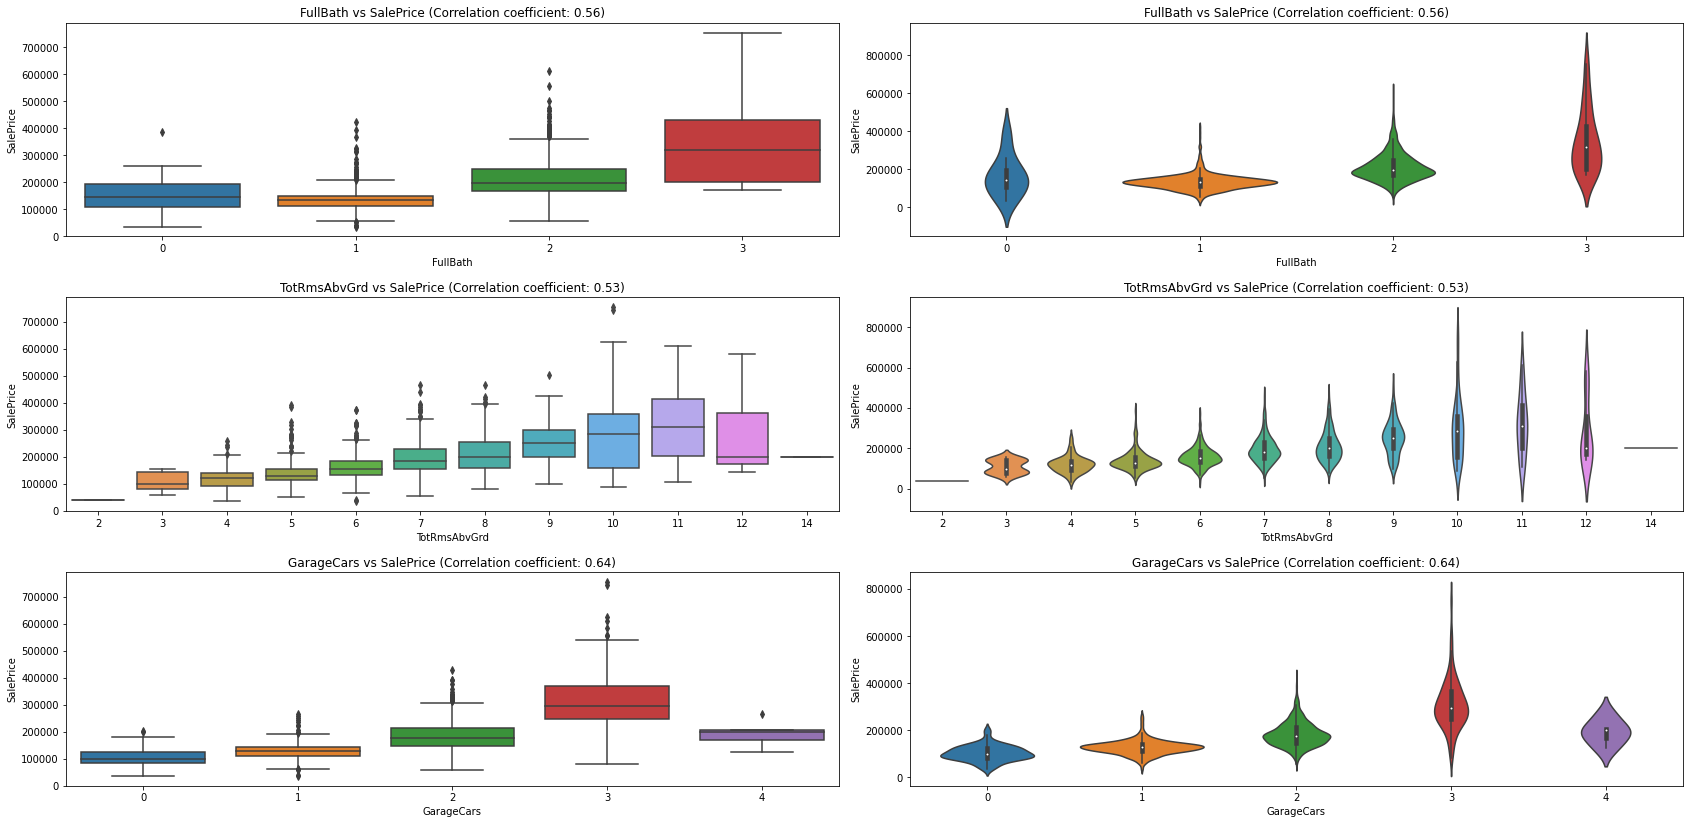

In [48]:
# Correlation coefficient is: FullBath(0.56), TotRmsAbvGrd(0.53), GarageCars(0.64)

figure, ax = plt.subplots(3,2, figsize = (24,12))
figure.tight_layout(pad=4.0) # To increase the space between subplots

sns.boxplot(data=train_data, x = 'FullBath', y='SalePrice', ax = ax[0,0])
sns.violinplot(data=train_data, x = 'FullBath', y='SalePrice', ax = ax[0,1])
ax[0,0].set_title('FullBath vs SalePrice (Correlation coefficient: 0.56)', fontsize = 12)
ax[0,1].set_title('FullBath vs SalePrice (Correlation coefficient: 0.56)', fontsize = 12)

sns.boxplot(data=train_data, x = 'TotRmsAbvGrd', y='SalePrice', ax = ax[1,0])
sns.violinplot(data=train_data, x = 'TotRmsAbvGrd', y='SalePrice', ax = ax[1,1])
ax[1,0].set_title('TotRmsAbvGrd vs SalePrice (Correlation coefficient: 0.53)', fontsize = 12)
ax[1,1].set_title('TotRmsAbvGrd vs SalePrice (Correlation coefficient: 0.53)', fontsize = 12)

sns.boxplot(data=train_data, x = 'GarageCars', y='SalePrice', ax = ax[2,0])
sns.violinplot(data=train_data, x = 'GarageCars', y='SalePrice', ax = ax[2,1])
ax[2,0].set_title('GarageCars vs SalePrice (Correlation coefficient: 0.64)', fontsize = 12)
ax[2,1].set_title('GarageCars vs SalePrice (Correlation coefficient: 0.64)', fontsize = 12)

plt.show()

> *Outliers Check*

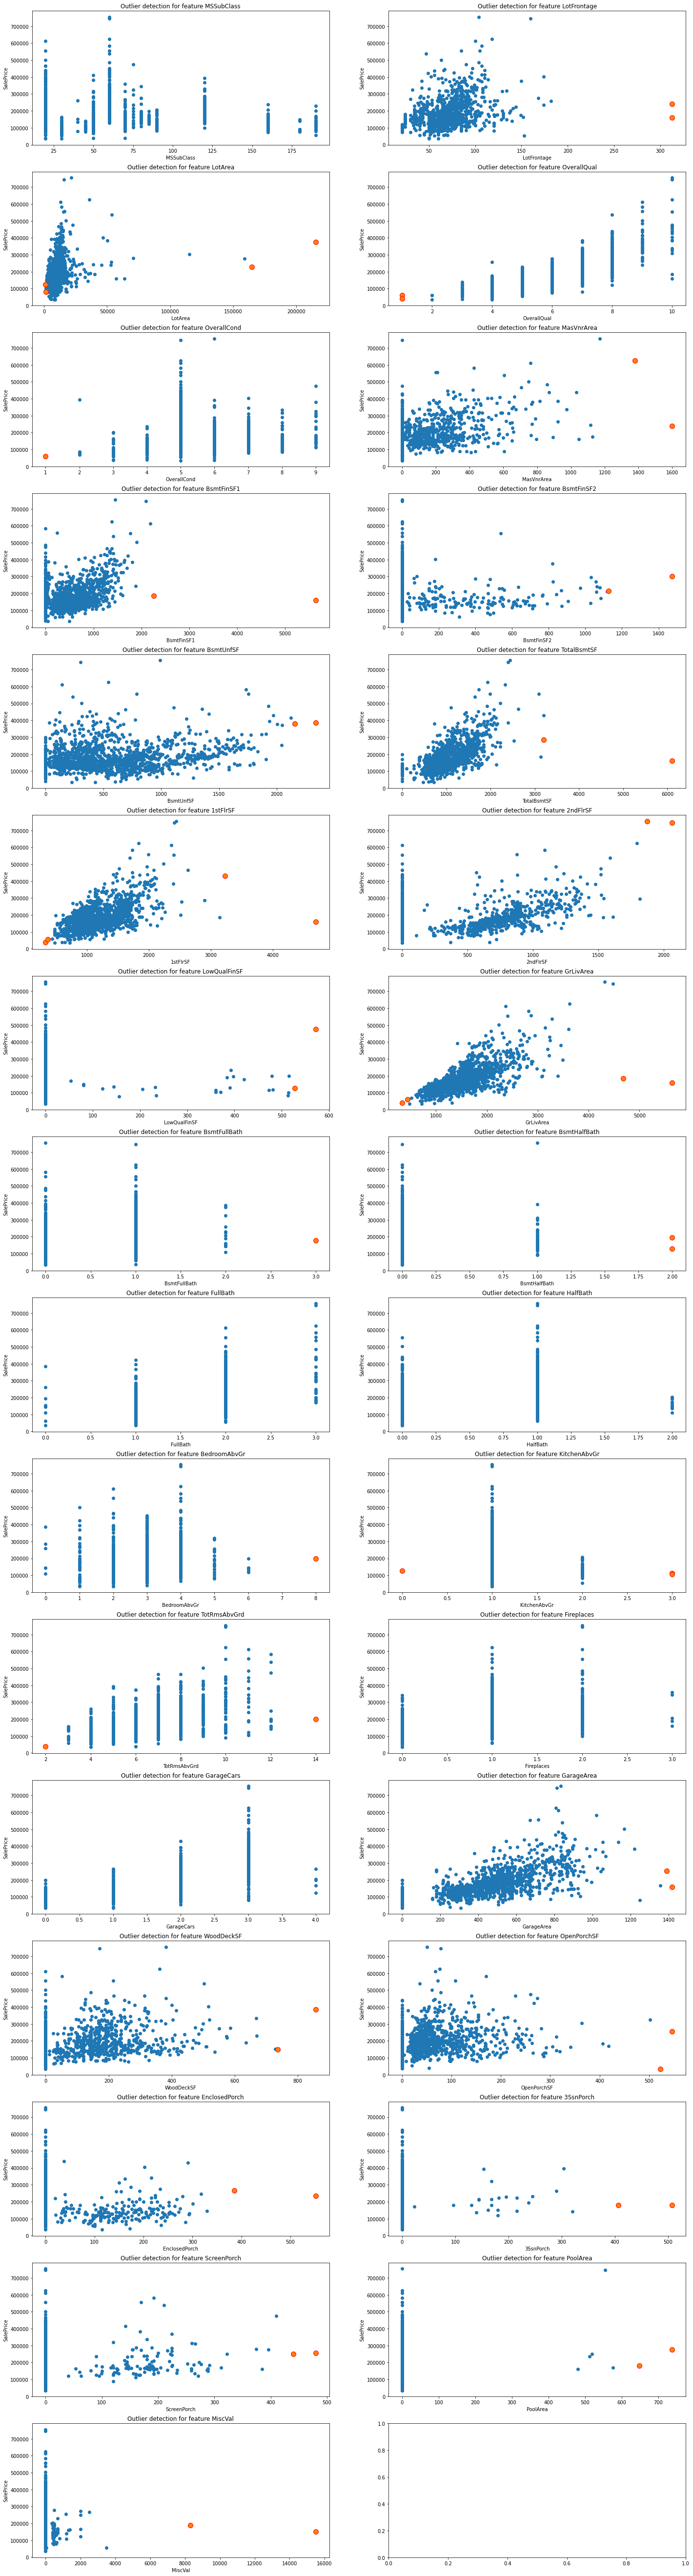

outliers: [934, 1298, 313, 335, 956, 1039, 375, 533, 375, 297, 1169, 523, 1298, 322, 542, 224, 477, 332, 1298, 496, 533, 705, 1298, 691, 1182, 170, 185, 523, 533, 1100, 1298, 738, 597, 954, 635, 48, 809, 954, 533, 635, 581, 1298, 53, 1459, 495, 1328, 197, 747, 55, 205, 1328, 1386, 810, 1423, 346, 1230]
unique_outliers: [523, 1039, 1423, 1169, 1298, 533, 542, 1182, 934, 297, 170, 809, 810, 48, 1328, 691, 1459, 53, 55, 313, 185, 954, 956, 705, 322, 581, 197, 332, 1100, 205, 335, 1230, 597, 346, 477, 224, 738, 1386, 747, 495, 496, 375, 635]
Shape of train data= (1460, 81)
Shape of train data= (1417, 81)


In [49]:
train=train_data
min_percentile= 0.001
max_percentile= 0.999
# Use numeric features
features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
            'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
target= 'SalePrice'
nrows= int(np.ceil(len(features)/2))
ncols= 2 

def detect_and_remove_outliers(inline_delete= True):
    global train
    fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (24, nrows * 6))
    outliers = []
    cnt = 0
    for row in range (0, nrows):
        for col in range (0, ncols):
            # df_outliers = outlier_detection_using_percentile(features[cnt])
            # Outlier detection using percentile
            min_thresold, max_thresold = train[features[cnt]].quantile([min_percentile, max_percentile])
            # print(f'outlier_detection_using_percentile()> min_thresold: {min_thresold}, max_thresold: {max_thresold}')
            # print (f'No of outliers below min_thresold: {len(train[train[feature] < min_thresold])}')
            # print (f'No of outliers above max_thresold: {len(train[train[feature] > max_thresold])}')
            df_outliers = train[(train[features[cnt]] < min_thresold) | (train[features[cnt]] > max_thresold)]

            # Updaing list of outliers
            outliers = outliers + df_outliers.index.tolist()

            # Plot feature vs target using scatter plot
            ax[row][col].scatter(x = train[features[cnt]], y= train[target])
     
            # Mark outlier records in same scatter plot
            ax[row][col].scatter(x= df_outliers[features[cnt]],  y=df_outliers[target], marker ="o", edgecolor ="red", s = 100)
            ax[row][col].set_xlabel(features[cnt])
            ax[row][col].set_ylabel(target)
            ax[row][col].set_title('Outlier detection for feature ' + features[cnt])

            if inline_delete: 
                # Drop the outliers inline
                # drop_outliers(df_outliers.index.tolist())
                # print(f'Shape of train data= {train.shape}')
                train = train.drop(df_outliers.index.tolist())
                train.reset_index(drop = True, inplace = True)
                # print(f'Shape of train data= {train.shape}')

            cnt = cnt + 1
            if cnt >= len(features):
                break
    plt.show()

    print(f'outliers: {outliers}')
    unique_outliers= list(set(outliers))
    print(f'unique_outliers: {unique_outliers}')
    
    if inline_delete == False: 
        # Drop the unique outliers from final list
        print(f'Shape of train data= {train.shape}')
        train = train.drop(unique_outliers)
        train.reset_index(drop = True, inplace = True)
        print(f'Shape of train data= {train.shape}')
        
        
detect_and_remove_outliers(inline_delete= False)


> *Visulaize the feature(after droping outliers) and target relationship*

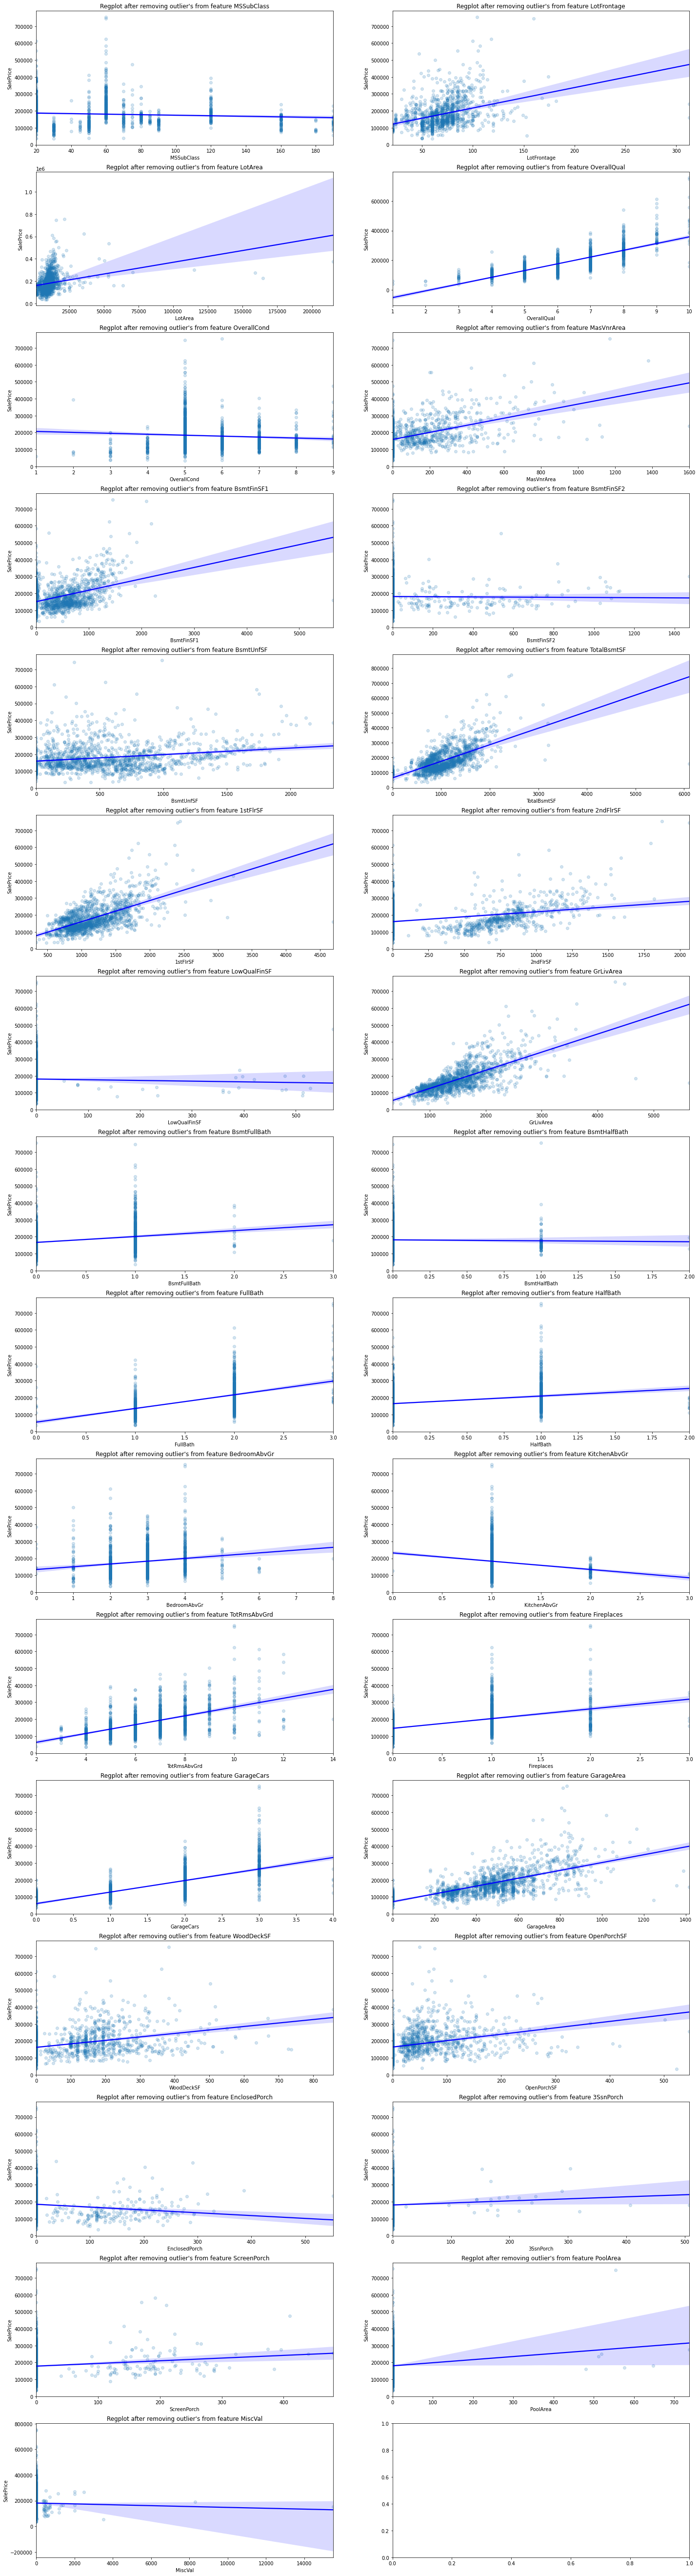

In [50]:
train=train_data
fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (24, nrows * 6))

outliers = []
cnt = 0
for row in range (0, nrows):
    for col in range (0, ncols):
        sns.regplot(data=train, x = features[cnt], y= target, scatter_kws={'alpha':0.2}, line_kws={'color': 'blue'}, ax = ax[row,col]) # scatter_kws and line_kws used to pass additional keyword argument to change transparancy and line color
        ax[row,col].set_title("Regplot after removing outlier's from feature " + features[cnt], fontsize = 12)
        cnt = cnt + 1
        if cnt >= len(features):
            break
plt.show()

# Modeling

> *Linear Regression*

In [31]:
linear_reg = LinearRegression()
linear_reg.fit(train_X, train_y)
diabetes_y_pred = linear_reg.predict(test_X)
print("Mean Absolute Error using Linear Regression: ", mean_absolute_error(test_y, diabetes_y_pred))

Mean Absolute Error using Linear Regression:  21854.88939631313


> *Support Vector Regression*

In [33]:
svr_reg = pipeline.Pipeline([("scaling", preprocessing.RobustScaler()),
                               ("svr", svm.SVR(C= 46,
                                               epsilon= 0.009019504329938493,
                                               gamma= 0.0003434802243340735))])
svr_reg.fit(train_X,train_y)
svr_y_pred=svr_reg.predict(test_X)
print("Mean Absolute error using Support Vector Regression method:", mean_absolute_error(test_y,svr_y_pred))

Mean Absolute error using Support Vector Regression method: 53580.25164641651


> *Decision Tree Algorithm*

In [27]:
decision_model = DecisionTreeRegressor()  
decision_model.fit(train_X, train_y) 
predicted_decision_trees = decision_model.predict(test_X)
print ("Mean Absolute Error using Decision Tress :", mean_absolute_error(test_y, predicted_decision_trees))

Mean Absolute Error using Decision Tress : 27122.013698630137


> *Random Forest Algorithm*

In [28]:
forest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
forest_model.fit(train_X, train_y )
predicted_random_forest = forest_model.predict(test_X)
print("Mean Absolute Error using Random Forest:", mean_absolute_error(test_y, predicted_random_forest))

Mean Absolute Error using Random Forest: 17982.626423430887


> *XGBoost algorithm* 

In [29]:
xg_model = XGBRegressor(n_estimators=100)
xg_model.fit(train_X, train_y)
predicted_XGBoost = xg_model.predict(test_X)
print("Mean Absolute Error using XGBoost: ", mean_absolute_error(test_y, predicted_XGBoost))

[10:40:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error using XGBoost:  16502.604837328767


> *LightGBM algorithm*

In [71]:
lgbc=LGBMRegressor(boosting_type='gbdt',n_estimators=1000, max_depth=15,learning_rate=0.05, num_leaves=10, colsample_bytree=0.5,
           reg_alpha=50, reg_lambda=10, min_split_gain=0.001, min_child_weight=1e-10,min_child_samples=50,n_jobs=-1)
lgbc.fit(train_X,train_y)
lgbm_y_pred=lgbc.predict(test_X)
print("Mean Absolute Error using LightGBM: ", mean_absolute_error(test_y, lgbm_y_pred))

Mean Absolute Error using LightGBM:  16841.24460207058


> *Ridge Regressor*

In [34]:
ridge_reg=linear_model.Ridge()
ridge_reg.fit(train_X,train_y)
ridge_y_pred=ridge_reg.predict(test_X)
print("mean absolute error", mean_absolute_error(test_y,svr_y_pred))

mean absolute error 53580.25164641651


> *Bayesian Ridge Regressor*

In [32]:
bayesian_ridge_reg = BayesianRidge(alpha_1= 2.104047761709729e-05,
                               alpha_2= 8.87111148542247e-06,
                               lambda_1= 0.9517616852006183,
                               lambda_2= 0.016369928482509982,
                               compute_score= False
                              )
bayesian_ridge_reg.fit(train_X, train_y)
bayesian_ridge_reg_y_pred = bayesian_ridge_reg.predict(test_X)
print("Mean Absolute Error using Bayesian Ridge Regressor:", mean_absolute_error(test_y, bayesian_ridge_reg_y_pred))

Mean Absolute Error using Bayesian Ridge Regressor: 24087.765595725254


# Ensemble of Models

> *Ensemble - Stacked Regression and GridSearch*

Stacking is an ensemble learning technique to combine multiple regression models via a meta-regressor. In this case, XG Boost has been used as a meta-regressor and the predictions of Lasso Regression, Elasticnet and XG Boost has been used as the training set of stacking. 

In [68]:
XGB = XGBRegressor()

ELNET = ElasticNet(random_state = 1)
LCV=Lasso(random_state = 1)
XG = XGBRegressor()
stack = StackingRegressor(regressors = [ELNET,LCV,XG],meta_regressor = XGB)

kfold = KFold(n_splits=20, random_state= 0, shuffle = True)


params = {       
              'meta-xgbregressor__n_estimators' : [740*2],#740
              'meta-xgbregressor__learning_rate': [0.01/2], #0.01
              'meta-xgbregressor__min_child_weight':[0],
              'meta-xgbregressor__gamma':[0.1],
              'meta-xgbregressor__max_depth': [2],
              'meta-xgbregressor__subsample':[0.65],
              'meta-xgbregressor__colsample_bytree':[0.4],
              'meta-xgbregressor__reg_alpha':[0],
              'meta-xgbregressor__reg_lambda':[1],
              
              'lasso__alpha':[0.00244736842105],
              'elasticnet__alpha':[0.0276315789474],
              'elasticnet__l1_ratio':[0.09],
              'xgbregressor__min_child_weight':[0.2],
              'xgbregressor__n_estimators' : [870],
              'xgbregressor__learning_rate': [0.04],
              'xgbregressor__gamma':[0],
              'xgbregressor__max_depth': [3],
              'xgbregressor__subsample':[0.8],
              'xgbregressor__colsample_bytree':[0.7]
        }

grid = GridSearchCV(estimator = stack, param_grid=params,cv=kfold,refit=True, verbose=1,n_jobs=1,scoring="neg_mean_absolute_error")
grid.fit(train_X, train_y)
grid_best = grid.best_estimator_
print(grid_best)

Fitting 20 folds for each of 1 candidates, totalling 20 fits
[13:15:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 596954857743.3252, tolerance: 622865132.2404093
  positive)


[13:15:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 695052689716.3644, tolerance: 669926556.5458223
  positive)


[13:15:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:15:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 619603274885.3512, tolerance: 619238391.856489
  positive)


[13:15:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:15:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 671169758912.1797, tolerance: 644786854.8655967
  positive)


[13:15:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:15:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 681983102868.1782, tolerance: 655802639.6901966
  positive)


[13:15:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:15:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 685553949925.8868, tolerance: 665218620.9312453
  positive)


[13:15:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:16:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 654644774811.5836, tolerance: 647002112.4247923
  positive)


[13:16:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:16:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 696779569854.1569, tolerance: 668678752.778175
  positive)


[13:16:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:16:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 686921042991.0314, tolerance: 659262980.9830223
  positive)


[13:16:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:16:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 685304440814.8684, tolerance: 645545930.2640784
  positive)


[13:16:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:16:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 505894205999.0355, tolerance: 618369647.1931812
  positive)


[13:16:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:16:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 693600587907.5663, tolerance: 662331123.6911192
  positive)


[13:16:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:16:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 687534334492.1016, tolerance: 658491053.3110491
  positive)


[13:16:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:16:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 685237259407.5137, tolerance: 660022177.2074492
  positive)


[13:16:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:16:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 684855753781.421, tolerance: 651345154.0180305
  positive)


[13:16:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:16:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 678926012215.1018, tolerance: 656556051.0334342
  positive)


[13:16:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:16:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 692376461881.153, tolerance: 661936930.835549
  positive)


[13:16:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:16:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 695361959360.4054, tolerance: 671668593.5114464
  positive)


[13:16:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:16:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 692031251239.5427, tolerance: 661065897.385562
  positive)


[13:16:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:16:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 684808119889.1338, tolerance: 656341525.4632555
  positive)


[13:16:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:16:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   38.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 708538704899.0541, tolerance: 687213831.7351607
  positive)


[13:16:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:16:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
StackingRegressor(meta_regressor=XGBRegressor(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=0.4, gamma=0.1,
                                              importance_type='gain',
                                              learning_rate=0.005,
                                              max_delta_step=0, max_depth=2,
                                              min_child_weight=0, missing=None,
                                              n_estimators=1480, n_jobs=1,
                                              nthread=None,
                         

In [69]:
Stacked_reg_grid_search_y_pred=grid.predict(test_X)
print("Mean Absolute Error using Ensemble Method of Stacked Regression and Grid Search:", mean_absolute_error(test_y,Stacked_reg_grid_search_y_pred))


Mean Absolute Error using Ensemble Method of Stacked Regression and Grid Search: 15841.06899614726


> *Ensemble: Averaging*

Amongst the above models, following are those which gave the least mean absolute error:
*   Ensemble - Stacked Regression and GridSearch (error=15841.06899614726)
*   LightGBM algorithm (error=16841.24460207058)
*   XGBoost algorithm (error=16502.604837328767)
*   Random Forest Algorithm (error=17982.626423430887)

Hence, the average of the prediction by these four models will be taken as the final predicted value in this project. 







In [76]:
Stacked_reg_grid_search_y_pred
y_submission_avg = (predicted_XGBoost+predicted_random_forest+lgbm_y_pred+Stacked_reg_grid_search_y_pred)/4

y_submission_avg

array([111924.4537083 , 170869.11059696, 151899.39157897, 180686.84909925,
       171209.75207578, 247521.13744273, 186349.08067721, 186136.97586426,
       184173.29050763, 302602.20792999, 170895.01489808, 222537.09449554,
       206486.31664288, 216440.49589519, 117147.07947758, 147759.58306185,
        90824.832883  , 278454.86336592, 125933.33028364, 161012.4207878 ,
       171846.90333243, 209172.84834661, 113841.94010911, 299741.59465909,
       146212.2028193 , 264760.72645689, 146032.94699807, 199573.1073454 ,
       182616.52592978, 175165.7882294 ,  95601.89007677, 205989.28946938,
       152686.30225684, 165627.09146619, 255895.92514531, 207107.63066908,
       147958.61942156, 151937.01516839, 126601.24268622, 174027.52391012,
       126860.55623786, 269433.62908565, 154243.6303459 , 235401.28245283,
       157950.88525309, 248820.22445337, 120868.88784048, 123540.63195588,
       134869.52282753, 153015.0590892 , 150584.33368599, 268246.50104681,
       161949.80013381, 2